Enter Keyword/Tag to search about: rafale
Enter how many tweets to search: 100
How people are reacting on rafale by analyzing 100 Tweets.
Positive


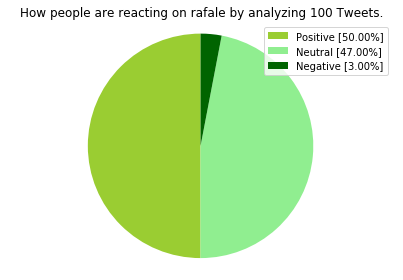

In [3]:
from textblob import TextBlob
import sys, tweepy
import matplotlib.pyplot as plt


def percentage(part, whole):
    return 100*float(part)/float(whole)


consumerKey = "gUMr9AbzAH7oaPt52cRppoSHG"
consumerSecret = "JOofvs0CiZd09GQl8y9Bflip4hL2SVZy0Z86tDpW7yKQ8O2ENF"
accessToken = "1108107688800477184-CZSfsoOU24rXl22fMyFbyfHw2PpLZx"
accessTokenSecret = "5zREPBzLSvKEA3p43JbJoY9IvvC5Sb5LqNqzrW4Nbc5sA"

auth = tweepy.OAuthHandler(consumerKey, consumerSecret)
auth.set_access_token(accessToken, accessTokenSecret)
api = tweepy.API(auth)

searchTerm = input("Enter Keyword/Tag to search about: ")
NoOfTerms = int(input("Enter how many tweets to search: "))

tweets = tweepy.Cursor(api.search, q=searchTerm, lang = "en").items(NoOfTerms)

polarity = 0
positive = 0
negative = 0
neutral = 0

for tweet in tweets:
    analysis = TextBlob(tweet.text)
    polarity +=analysis.sentiment.polarity
    
    if (analysis.sentiment.polarity == 0):
        neutral += 1
    elif (analysis.sentiment.polarity < 0):
        negative +=1
    elif (analysis.sentiment.polarity > 0):
        positive +=1
    
positive = percentage(positive, NoOfTerms)
negative = percentage(negative, NoOfTerms)
neutral = percentage(neutral, NoOfTerms)

positive = format(positive, '.2f')
negative = format(negative, '.2f')
neutral = format(neutral, '.2f')
    
print("How people are reacting on " + searchTerm + " by analyzing " + str(NoOfTerms) + " Tweets.")

if (polarity == 0):
    print('Neutral')
elif (polarity < 0):
    print ('Negative')
elif (polarity > 0):
    print ('Positive')
    
labels = ['Positive [' + str(positive) + '%]', 'Neutral [' + str(neutral) + '%]','Negative [' + str(negative) + '%]']
sizes = [positive, neutral, negative]
colors = ['yellowgreen','lightgreen','darkgreen']
patches, texts = plt.pie(sizes, colors=colors, startangle=90)
plt.legend(patches, labels, loc="best")
plt.title('How people are reacting on ' + searchTerm + ' by analyzing ' + str(NoOfTerms) + ' Tweets.')
plt.axis('equal')
plt.tight_layout()
plt.show()